In [91]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [92]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


reading the dataset in the dataframe.
my target column here is quality,
all columns are continuous datatype.

In [93]:
df.shape

(1599, 12)

the shape of the dataset is 1599 rows and 12 columns

In [94]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

as we can see all the columns are float datatype except the quality, it is integer datatype.

In [95]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

we can see all the column names in the dataset.

In [96]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

there are no null values present in the dataset

In [97]:
df.quality.unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

3,4,5,6,7,8 are the unique values which are present in the quality column

In [98]:
df.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

it shows the total counts of every unique value in the quality column.

In [99]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


the mean is more than median in almost every column, hence the graph is skewed.

there is a large difference in 75 percentile and max in residual sugar, free sulphur dioxide, total sulphur
dioxide hence there are outliers present.

In [100]:
df_correlation=df.corr()
df_correlation

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


<AxesSubplot:>

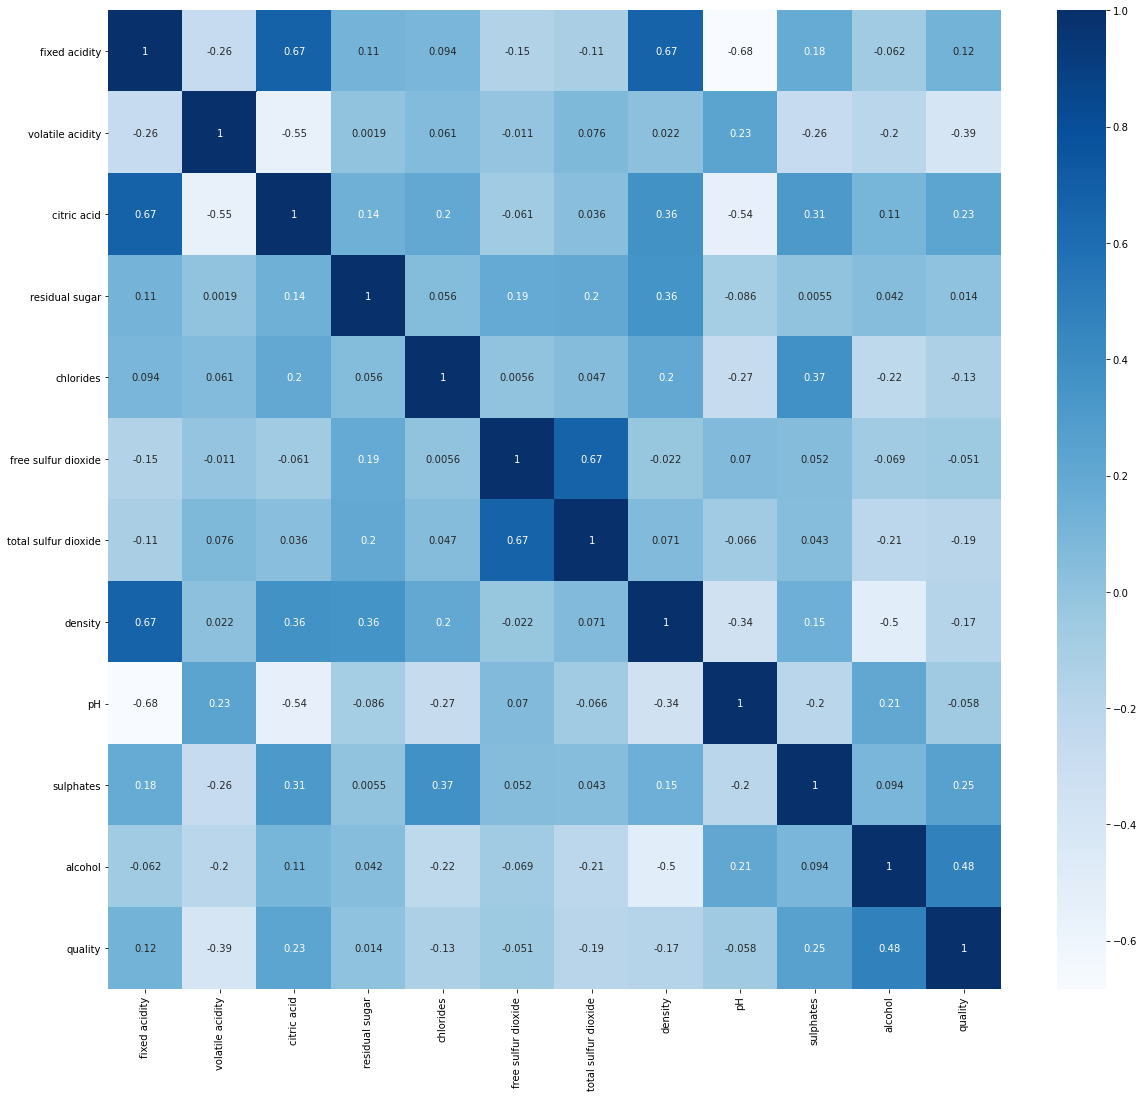

In [101]:
plt.figure(figsize=(20,18))
sns.heatmap(df_correlation,cmap='Blues',annot=True)


we can see the most positive correlation that we can see with the target column quality is alcohot, least correlation is volatile acidity.  free sulphur dioxide and total sulphur dioxide are highly correlated with each other.

<AxesSubplot:>

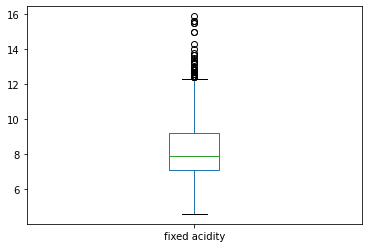

In [102]:
df['fixed acidity'].plot.box()

outliers are present

<AxesSubplot:>

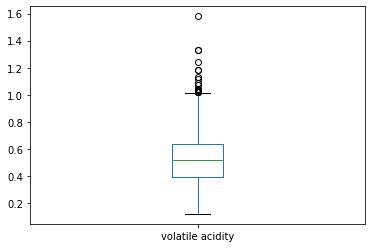

In [103]:
df['volatile acidity'].plot.box()

outliers are present

<AxesSubplot:>

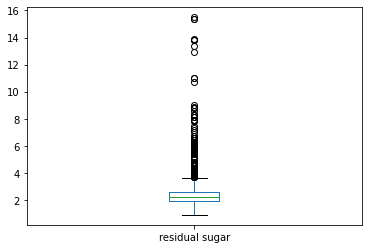

In [104]:
df['residual sugar'].plot.box()

outliers are present

<AxesSubplot:>

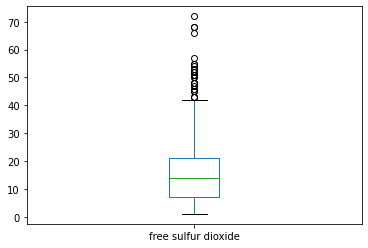

In [105]:
df['free sulfur dioxide'].plot.box()

outliers are present

<AxesSubplot:>

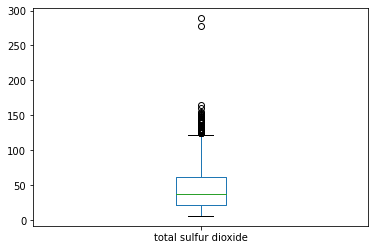

In [106]:
df['total sulfur dioxide'].plot.box()

outliers are present

fixed acidity              AxesSubplot(0.125,0.536818;0.110714x0.343182)
volatile acidity        AxesSubplot(0.257857,0.536818;0.110714x0.343182)
citric acid             AxesSubplot(0.390714,0.536818;0.110714x0.343182)
residual sugar          AxesSubplot(0.523571,0.536818;0.110714x0.343182)
chlorides               AxesSubplot(0.656429,0.536818;0.110714x0.343182)
free sulfur dioxide     AxesSubplot(0.789286,0.536818;0.110714x0.343182)
total sulfur dioxide          AxesSubplot(0.125,0.125;0.110714x0.343182)
density                    AxesSubplot(0.257857,0.125;0.110714x0.343182)
pH                         AxesSubplot(0.390714,0.125;0.110714x0.343182)
sulphates                  AxesSubplot(0.523571,0.125;0.110714x0.343182)
alcohol                    AxesSubplot(0.656429,0.125;0.110714x0.343182)
quality                    AxesSubplot(0.789286,0.125;0.110714x0.343182)
dtype: object

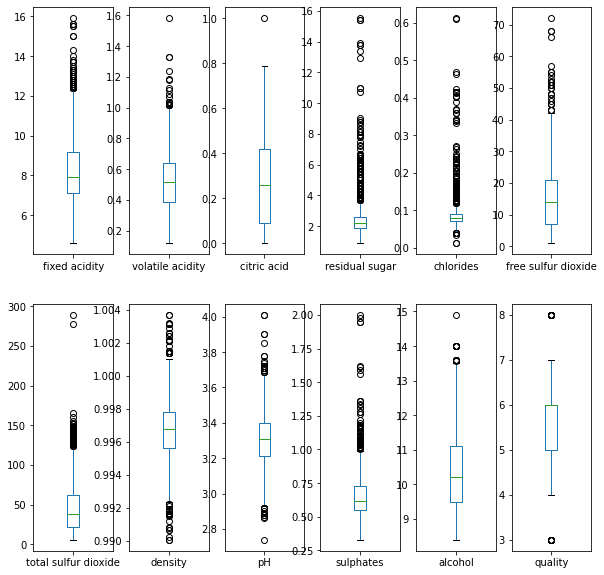

In [107]:
df.plot(kind='box',subplots=True,layout=(2,6),figsize=(10,10))

outliers are present in almost every column.

<AxesSubplot:xlabel='fixed acidity', ylabel='Density'>

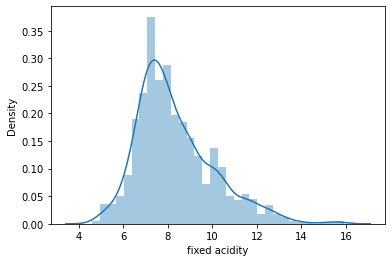

In [108]:
sns.distplot(df['fixed acidity'])

graph is skewed.

<AxesSubplot:xlabel='volatile acidity', ylabel='Density'>

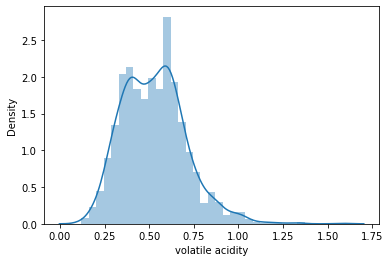

In [109]:
sns.distplot(df['volatile acidity'])

plot is skewwd

<AxesSubplot:xlabel='citric acid', ylabel='Density'>

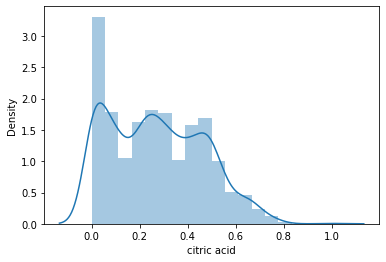

In [110]:
sns.distplot(df['citric acid'])

plot is skewed.

<AxesSubplot:xlabel='residual sugar', ylabel='Density'>

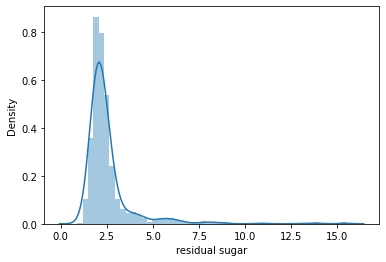

In [111]:
sns.distplot(df['residual sugar'])

plot is skewed.

In [112]:
df.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

except citric acid, density skewness is present in every column.

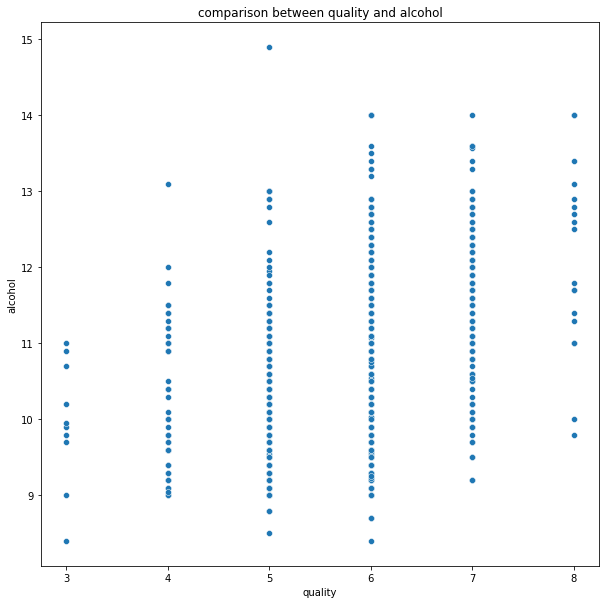

In [113]:
plt.figure(figsize=[10,10])
plt.title("comparison between quality and alcohol")
sns.scatterplot(df['quality'],df['alcohol']);

as we can see from the graph that lower the alcohol lower the quality, higher the alcohol higher the quality.

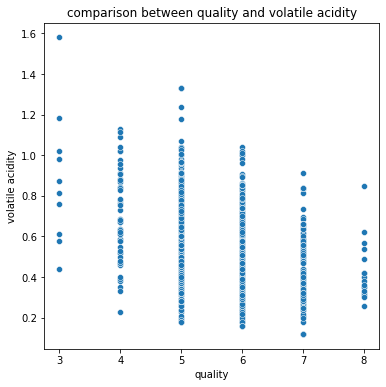

In [114]:
plt.figure(figsize=[6,6])
plt.title("comparison between quality and volatile acidity")
sns.scatterplot(df['quality'],df['volatile acidity']);

more the volatile acidity less is the quality

In [115]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([  13,   14,   15,   15,   17,   17,   19,   33,   38,   42,   43,
          45,   57,   81,   81,   83,   86,   88,   91,   92,   95,  106,
         106,  109,  120,  126,  127,  142,  144,  147,  151,  151,  151,
         151,  163,  164,  169,  169,  181,  199,  226,  226,  240,  243,
         244,  258,  258,  274,  281,  291,  324,  325,  339,  340,  347,
         354,  374,  381,  391,  396,  396,  400,  400,  442,  442,  451,
         459,  467,  480,  480,  494,  515,  517,  544,  554,  554,  555,
         555,  557,  557,  568,  584,  588,  591,  595,  608,  614,  636,
         639,  649,  649,  651,  652,  652,  652,  672,  672,  684,  690,
         690,  692,  692,  695,  723,  724,  730,  754,  776,  777,  795,
         821,  832,  836,  837,  889,  899,  911,  917,  923,  925,  926,
         982, 1017, 1018, 1043, 1051, 1051, 1071, 1074, 1079, 1079, 1081,
        1081, 1111, 1114, 1131, 1154, 1165, 1175, 1186, 1231, 1235, 1244,
        1244, 1244, 1260, 1269, 1269, 

this is the matrix where the z score is more than 3(threshold)

In [116]:
df_new=df[(z<3).all(axis=1)]
df_new.head()
df_new.shape

(1451, 12)

after removing the outliers the shape  is 1451 rows and 12 columns.

In [117]:
Data_loss=((1599-1451)/1599)*100
Data_loss # here  data  loss is more than 6%  

9.255784865540964

i will not remove the outliers because there will be huge data loss.

In [119]:
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [120]:
def calc_vif(df):
    vif=pd.DataFrame()
    vif["variables"]=df.columns
    vif["VIF FACTOR"]=[variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
    return(vif)

In [121]:
calc_vif(df)

,variables,VIF FACTOR
0,fixed acidity,74.455312
1,volatile acidity,17.960867
2,citric acid,9.192549
3,residual sugar,4.664003
4,chlorides,6.641291
5,free sulfur dioxide,6.460603
6,total sulfur dioxide,6.605274
7,density,1528.154302
8,pH,1078.171089
9,sulphates,22.462103


the multicollinearity of density and ph is quite high. we will drop density column in order to reduce the multicollinearity.

In [122]:
df.drop('density',axis=1,inplace=True)

dropped density column.

In [123]:
df.shape

(1599, 11)

after dropping the column, 1599 rows and 11 columns.

In [124]:
calc_vif(df)

,variables,VIF FACTOR
0,fixed acidity,41.427952
1,volatile acidity,17.942015
2,citric acid,9.165111
3,residual sugar,4.663615
4,chlorides,6.042817
5,free sulfur dioxide,6.398389
6,total sulfur dioxide,6.125698
7,pH,165.657063
8,sulphates,22.461458
9,alcohol,147.171533


vif has reduced for all the columns after dropping one column.

In [125]:
df.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

almost every column has skewness except citric acid, ph, quality.

In [126]:
bins=(2,6,8)
group_names=['bad','good']
df['quality']=pd.cut(df['quality'],bins=bins,labels=group_names)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,3.51,0.56,9.4,bad
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,3.20,0.68,9.8,bad
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,3.26,0.65,9.8,bad
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,3.16,0.58,9.8,bad
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,3.51,0.56,9.4,bad
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,3.45,0.58,10.5,bad
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,3.52,0.76,11.2,bad
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,3.42,0.75,11.0,bad
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,3.57,0.71,10.2,bad


grouping the quality column into good and bad wine, bad wine comes uner 6 and below and good comes above 6.

In [127]:
df['quality'].value_counts()

bad     1382
good     217
Name: quality, dtype: int64

data is highly imbalanced, we need to balance it.

<AxesSubplot:xlabel='quality', ylabel='count'>

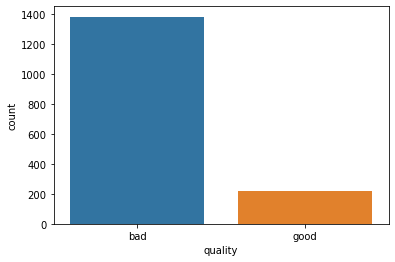

In [128]:
sns.countplot(df['quality'])

pictorial representation of the count of good and bad quality, data is imbalanced.

In [129]:
x=df.iloc[:,0:10]
y=df.iloc[:,-1]

dividing dataframe into x and y for data cleaning, training and testing.

In [130]:
x.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
dtype: float64

In [131]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer(method='yeo-johnson') 
x=pt.fit_transform(x)

In [132]:
x=pd.DataFrame(x)

In [133]:
x.skew()

0    0.002529
1    0.003099
2    0.017788
3   -0.015715
4   -0.151304
5   -0.009948
6   -0.003752
7   -0.002823
8    0.009985
9    0.112372
dtype: float64

skewness is removed by using power transform method, as all columns are in between-/+ 0.5.

In [134]:
x.dtypes

0    float64
1    float64
2    float64
3    float64
4    float64
5    float64
6    float64
7    float64
8    float64
9    float64
dtype: object

all the datatype of x is float datatype

In [135]:
y.dtypes

CategoricalDtype(categories=['bad', 'good'], ordered=True)

y has categorical datatypes, good and bad. we need to encode thos for machine learning

In [136]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
LB = LabelEncoder()
y = LB.fit_transform(y)


usinng label encoder to encode the y column.

In [137]:
y=pd.DataFrame(y)
y

,0
0,0
1,0
2,0
3,0
4,0
...,...
1594,0
1595,0
1596,0
1597,0


good and bad is converted to 1 and 0 respectively.

In [138]:
from imblearn.over_sampling import SMOTE

In [139]:
smt=SMOTE()
trainx,trainy=smt.fit_resample(x,y)
trainx.value_counts()
trainy.value_counts()

0    1382
1    1382
dtype: int64

with the help of pver sampling technique, we increased the value of 1 to 1382

In [140]:
trainx.shape

(2764, 10)

shape of trainx is 2764 rows and 10 columns

In [141]:
trainy.shape

(2764, 1)

shape of trainy is 2764 rows and 1 column

In [142]:
x=pd.DataFrame(trainx)
x

,0,1,2,3,4,5,6,7,8,9
0,-0.442666,0.995542,-1.531109,-0.597145,-0.172896,-0.268045,-0.124411,1.275690,-0.581650,-1.075025
1,-0.161308,1.771299,-1.531109,0.556565,0.786204,0.993852,0.854954,-0.709517,0.395140,-0.500860
2,-0.161308,1.269801,-1.255359,0.152372,0.560696,0.193450,0.540394,-0.310054,0.183772,-0.500860
3,1.522582,-1.550050,1.398471,-0.597145,-0.226113,0.385115,0.693699,-0.980154,-0.392318,-0.500860
4,-0.442666,0.995542,-1.531109,-0.597145,-0.172896,-0.268045,-0.124411,1.275690,-0.581650,-1.075025
...,...,...,...,...,...,...,...,...,...,...
2759,-2.651336,-0.063877,-0.502531,-0.137980,-2.505681,0.291904,1.409986,1.100188,1.389609,1.886410
2760,-0.521423,0.427119,-1.507330,-0.406092,0.478685,-0.415274,-1.236535,0.503365,-0.647380,0.825203
2761,1.686906,-1.237688,1.127699,-1.318068,-0.835998,0.520566,-0.091976,-1.352629,0.510548,0.133362
2762,-0.325729,-1.658188,0.225630,-0.212781,-1.277716,0.511709,0.112317,0.169994,1.213418,0.821679


changing trainx to x dataframe

In [183]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=scaler.fit_transform(x)

In [184]:
x=pd.DataFrame(x)
x

,0,1,2,3,4,5,6,7,8,9
0,-0.537684,1.296896,-1.718113,-0.689745,-0.014055,-0.167316,0.079892,1.383480,-0.916428,-1.503891
1,-0.269715,2.072106,-1.718113,0.493561,0.923575,1.127339,1.077846,-0.675723,0.125707,-0.925848
2,-0.269715,1.570962,-1.446812,0.079000,0.703115,0.306160,0.757316,-0.261370,-0.099802,-0.925848
3,1.334042,-1.246901,1.164200,-0.689745,-0.066080,0.502800,0.913531,-0.956447,-0.714430,-0.925848
4,-0.537684,1.296896,-1.718113,-0.689745,-0.014055,-0.167316,0.079892,1.383480,-0.916428,-1.503891
...,...,...,...,...,...,...,...,...,...,...
2759,-2.641248,0.238224,-0.706130,-0.218801,-2.294618,0.407169,1.643412,1.201437,1.186703,1.477540
2760,-0.612693,0.728875,-1.694717,-0.493791,0.622940,-0.318367,-1.053340,0.582368,-0.986555,0.409168
2761,1.490547,-0.934758,0.897796,-1.429161,-0.662313,0.641767,0.112943,-1.342806,0.248836,-0.287344
2762,-0.426311,-1.354962,0.010281,-0.295521,-1.094142,0.632680,0.321113,0.236571,0.998725,0.405620


scaled the x dataframe.

In [185]:
y=pd.DataFrame(trainy)
y

,0
0,0
1,0
2,0
3,0
4,0
...,...
2759,1
2760,1
2761,1
2762,1


converted trainy into y dataframe

In [186]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [187]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=i)
    lm=DecisionTreeClassifier()
    lm.fit(x_train,y_train)
    pred=lm.predict(x_test)
    accu=accuracy_score(y_test,pred)
    if accu>maxAccu:
        maxAccu=accu
        maxRS=i
print("best accuracy is",maxAccu,"on random state",maxRS)

best accuracy is 0.9266155531215772 on random state 196


In [188]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=196)

doing train test split with best random score achieved.

In [189]:
model=[DecisionTreeClassifier(),SVC(),KNeighborsClassifier(),RandomForestClassifier()]
for a in model:
    a.fit(x_train,y_train)
    a.score(x_train,y_train)
    predm=a.predict(x_test)
    print('accuracy score of' ,a, 'is:')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('\n')

accuracy score of DecisionTreeClassifier() is:
0.91894852135816
[[412  47]
 [ 27 427]]
              precision    recall  f1-score   support

           0       0.94      0.90      0.92       459
           1       0.90      0.94      0.92       454

    accuracy                           0.92       913
   macro avg       0.92      0.92      0.92       913
weighted avg       0.92      0.92      0.92       913



accuracy score of SVC() is:
0.8926615553121577
[[381  78]
 [ 20 434]]
              precision    recall  f1-score   support

           0       0.95      0.83      0.89       459
           1       0.85      0.96      0.90       454

    accuracy                           0.89       913
   macro avg       0.90      0.89      0.89       913
weighted avg       0.90      0.89      0.89       913



accuracy score of KNeighborsClassifier() is:
0.8817086527929902
[[353 106]
 [  2 452]]
              precision    recall  f1-score   support

           0       0.99      0.77      0.87

above we get the accuracy scores of following models, in which best is random forest with 94.85 and worst is kneighbors, now we will check for overfitting.

In [190]:
from sklearn.model_selection import cross_val_score
for a in model:
    c=cross_val_score(a,x,y,cv=5).mean()
    print("the cross val score of",a,"is: ",c)

the cross val score of DecisionTreeClassifier() is:  0.8798890111906074
the cross val score of SVC() is:  0.8617960007338101
the cross val score of KNeighborsClassifier() is:  0.8585279241030479
the cross val score of RandomForestClassifier() is:  0.9247497182692561


after seeing the cross val score the least difference in the accuracy score and cross val score is Kneighbors mode, hence it is our best chosen model.

In [197]:
from sklearn.model_selection import GridSearchCV
import numpy as np

In [204]:
parameter={'algorithm':['auto','ball_tree','kd_tree','brute'],
         'weights':['uniform','distance'],
          'n_neighbors':np.arange(0,10),
          'p':np.arange(0,10)}

4 parameters for kneighbors

In [205]:
GCV=GridSearchCV(KNeighborsClassifier(),parameter,cv=5)

In [206]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'p': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'weights': ['uniform', 'distance']})

In [207]:
GCV.best_params_

{'algorithm': 'auto', 'n_neighbors': 1, 'p': 1, 'weights': 'uniform'}

In [209]:

wine_mod=KNeighborsClassifier(p=1,n_neighbors=1,algorithm='auto',weights='uniform')
wine_mod.fit(x_train,y_train)
pred=wine_mod.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

93.75684556407448


after hyperparameter tuning best accuracy is 93.75%.

In [210]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score


In [211]:
y_pred_prob=wine_mod.predict_proba(x_test)[:,1]

In [212]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

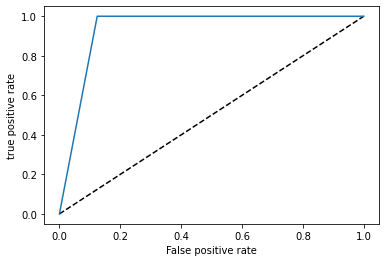

In [213]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='SVC')
plt.xlabel('False positive rate')
plt.ylabel('true positive rate')
plt.show()


the peak is little far from 1 hence our score will be less than 1, pictorial representation of confusion matrix.

In [214]:
auc_score=roc_auc_score(y_test,wine_mod.predict(x_test))

In [215]:
print(auc_score)

0.9379084967320261


auc score is almost similar to our model accuracy.

In [216]:
import joblib
joblib.dump(wine_mod,"winequalitymodel.pkl")

['winequalitymodel.pkl']

saved the best model in pkl file.